# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [20]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np
import scipy as sp
from skimage import io

from skimage import img_as_float
from matplotlib import cm
from skimage import img_as_ubyte
from scipy import signal



Pretty printing has been turned ON


## Filtering 
**1.1**

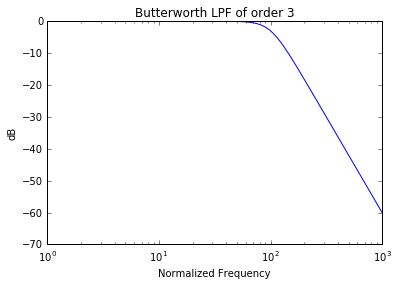

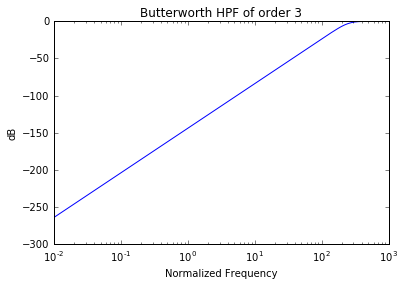

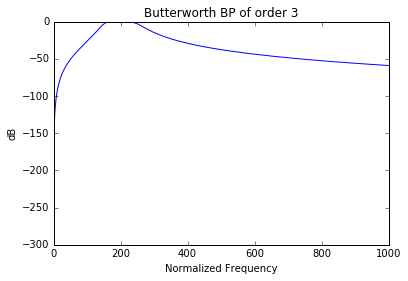

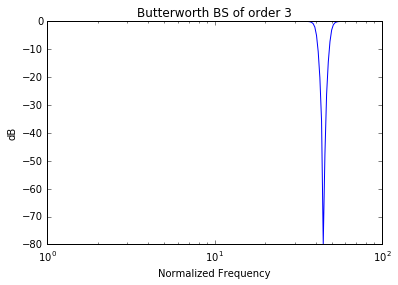

In [54]:



b, a = signal.butter(3, 100, 'low', analog=True)
w, h = signal.freqs(b, a)

plt.figure()
plt.title('Butterworth LPF of order 3')
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.ylabel('dB') 
plt.xlabel('Normalized Frequency')


c, d = signal.butter(3, 250, 'high', analog=True)
w1, h1 = signal.freqs(c, d)



e, f = signal.butter(3, [150, 250], 'band',True)
w2, h2 = signal.freqs(e, f)

g, h = signal.butter(3, [50,40], 'bandstop', analog=True)
w3, h3 = signal.freqs(g, h)




plt.figure()
plt.title('Butterworth HPF of order 3')
plt.semilogx(w1, 20 * np.log10(abs(h1)))
plt.ylabel('dB') 
plt.xlabel('Normalized Frequency')


plt.figure()
plt.title('Butterworth BP of order 3')
plt.plot(w2, 20 * np.log10(abs(h2)))
plt.ylabel('dB') 
plt.xlabel('Normalized Frequency')


plt.figure()
plt.title('Butterworth BS of order 3')
plt.semilogx(w3, 20 * np.log10(abs(h3)))
plt.ylabel('dB') 
plt.xlabel('Normalized Frequency')












/home/masters/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:28: RuntimeWarning: divide by zero encountered in log10


(<matplotlib.text.Text at 0x7fc982cfc8d0>,
 <matplotlib.text.Text at 0x7fc9825af790>)

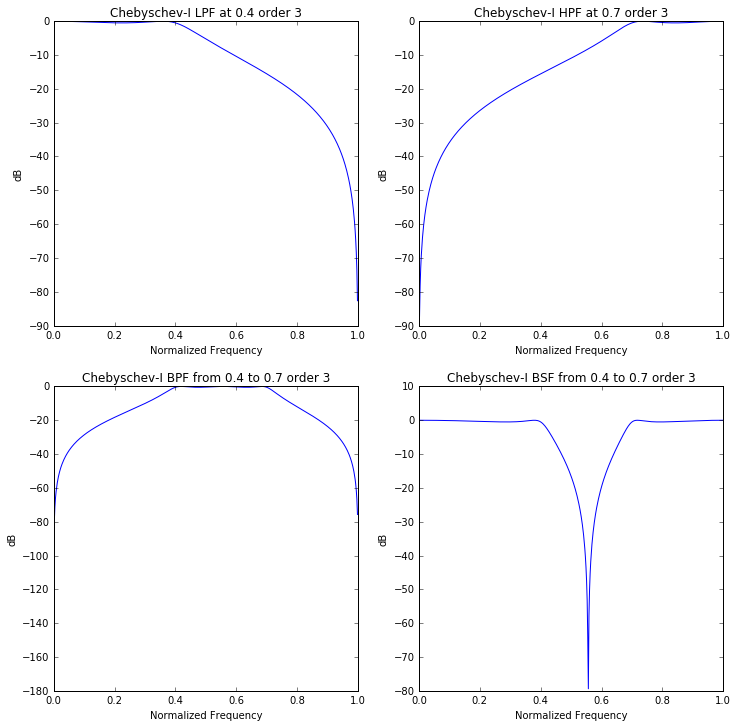

In [50]:
#Chebyschev!
filter_order = 3
w_cutoff = 0.4
w_pass = 0.7
max_ripple_db = 1.0

#lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’
b1,a1 = signal.cheby1(filter_order, max_ripple_db, w_cutoff, btype='lowpass')
b1,h1 = signal.freqz(cheb_b1, cheb_a1)

b2, a2 = signal.cheby1(filter_order, max_ripple_db, w_pass, btype='highpass')
w2, h2 = signal.freqz(cheb_b2, cheb_a2)

b3,a3 = signal.cheby1(filter_order, max_ripple_db, [w_cutoff, w_pass], btype='bandpass')
w3,h3 = signal.freqz(cheb_b3, cheb_a3)

b4,a4 = signal.cheby1(filter_order, max_ripple_db, [w_cutoff, w_pass], btype='bandstop')
w4,h4 = signal.freqz(cheb_b4, cheb_a4)

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('Chebyschev-I LPF at 0.4 order 3')
plt.plot(cheb_w1/np.pi, 10*np.log10(np.abs(cheb_h1)))
plt.ylabel('dB'), plt.xlabel('Normalized Frequency')

plt.subplot(2,2,2)
plt.title('Chebyschev-I HPF at 0.7 order 3')
plt.plot(cheb_w2/np.pi, 10*np.log10(np.abs(cheb_h2)))
plt.ylabel('dB'), plt.xlabel('Normalized Frequency')

plt.subplot(2,2,3)
plt.title('Chebyschev-I BPF from 0.4 to 0.7 order 3')
plt.plot(cheb_w3/np.pi, 10*np.log10(np.abs(cheb_h3)))
plt.ylabel('dB'), plt.xlabel('Normalized Frequency')

plt.subplot(2,2,4)
plt.title('Chebyschev-I BSF from 0.4 to 0.7 order 3')
plt.plot(cheb_w4/np.pi, 10*np.log10(np.abs(cheb_h4)))
plt.ylabel('dB'), plt.xlabel('Normalized Frequency')

**1.2**

## Recursive filter 

**2.1**

**2.2**

**2.3**

**2.4**

**3.1**

**3.2** , **3.3**

**3.4**